In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv("C:/Users/user/Downloads/iris.data")

In [40]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
df.columns = ['sepal length','sepal width','petal length','petal width','target']

In [42]:
df

,sepal length,sepal width,petal length,petal width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

<AxesSubplot:>

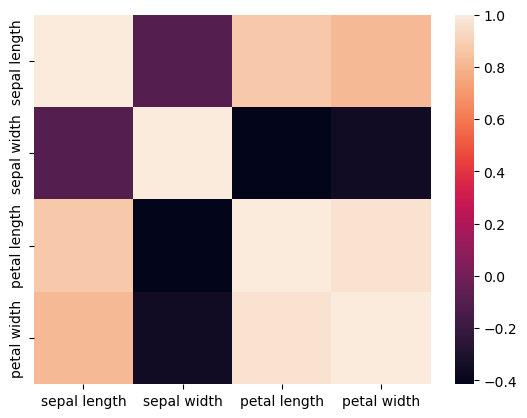

In [44]:
df_cor = df.corr()
sns.heatmap(df_cor)

<AxesSubplot:xlabel='target', ylabel='count'>

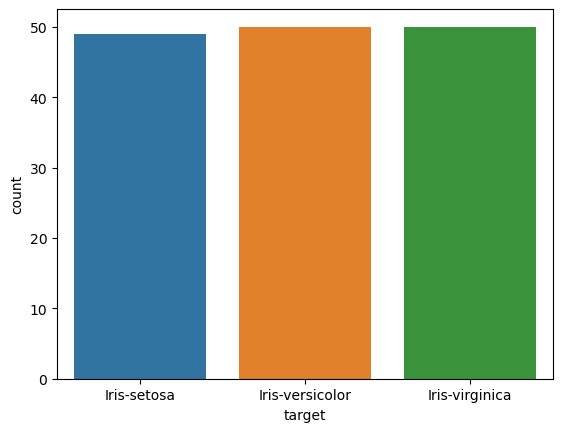

In [45]:
sns.countplot(x='target', data = df)

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

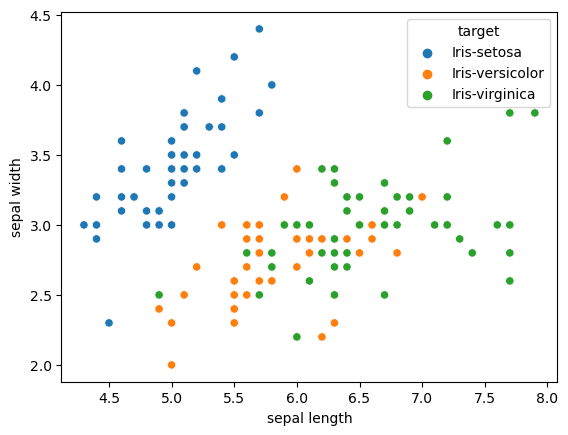

In [46]:
sns.scatterplot(data = df, x = 'sepal length', y= 'sepal width', hue='target')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length', ylabel='Density'>

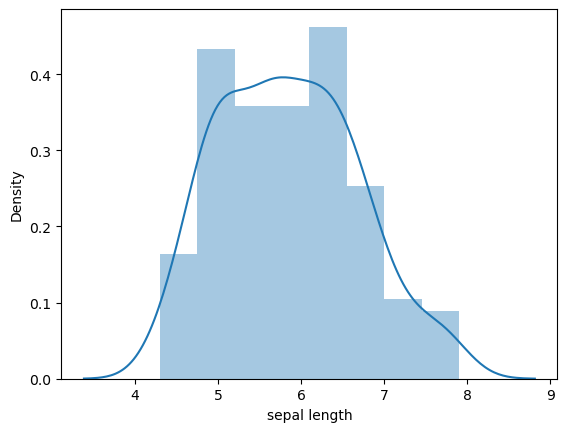

In [47]:
sns.distplot(df['sepal length'] )

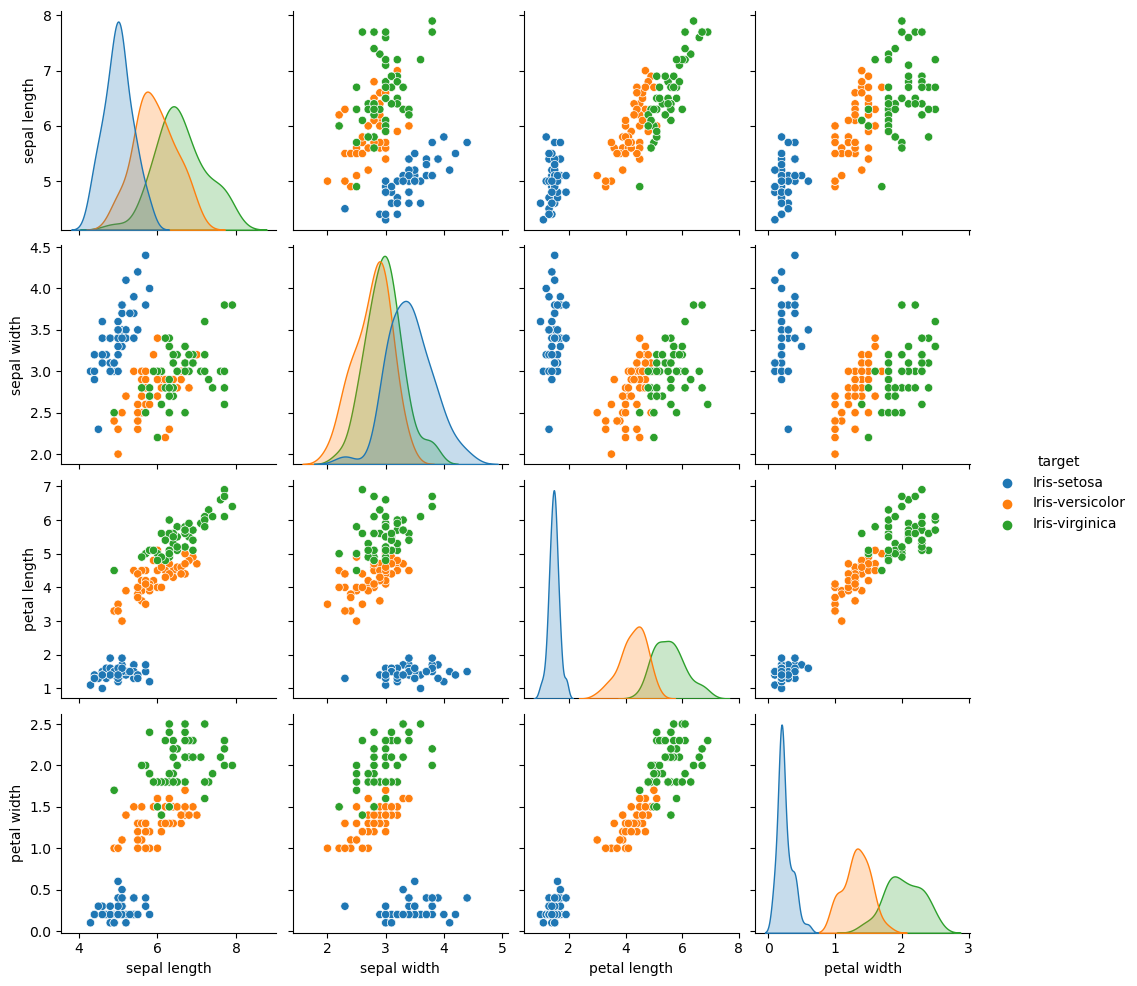

In [48]:
sns.pairplot(df, hue="target")

<AxesSubplot:xlabel='target', ylabel='petal width'>

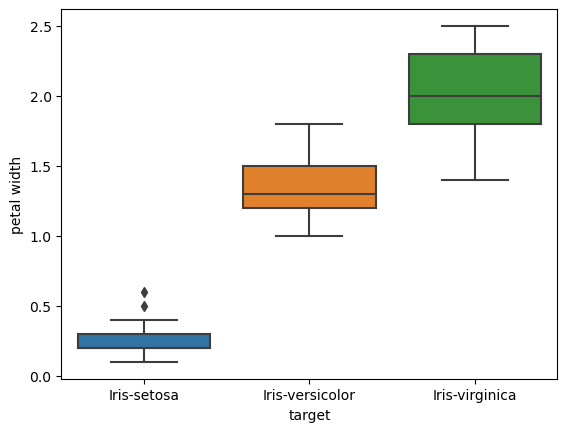

In [49]:
sns.boxplot(x="target", y="petal width", data=df)

In [50]:
X=df.drop('target',axis=1)
X

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [51]:
y = df['target']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: target, Length: 149, dtype: object

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9333333333333333
[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]


In [56]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8666666666666667
[[11  1  0]
 [ 0 10  0]
 [ 0  3  5]]


In [57]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9
[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9
[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier(n_neighbors=10)
clf_kn.fit(X_train, y_train)

pred_kn = clf_kn.predict(X_test)

print ("\n--- K Neighbors Classifier ---")
print (accuracy_score(y_test, pred_kn))
print (confusion_matrix(y_test, pred_kn))


--- K Neighbors Classifier ---
0.9333333333333333
[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]
